Reference: https://alexshtf.github.io/2024/01/21/Bernstein.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy.polynomial.polynomial as poly
from sklearn.linear_model import Ridge

### 1. Simple Polynomial Regression
- m = number of data points

- n = degree of polynomial


- Input: $$\{X_i\}_{i=0}^{m}$$

- Target: $$\{y_i\}_{i=0}^{m}$$

- Feature Expansion:
$$\mathbb{E}_n = {1, x, x^2, ..., x^n}$$


- Prediction:

$$\hat{y}_i = \alpha_0 \cdot 1 + \alpha_1 \cdot x + \alpha_2 \cdot x^2 + \cdots + \alpha_n x^n$$

- Loss:
$$L = \sum_{i=1}^m (\alpha_0 + \alpha_1 x_i + \dots + \alpha_n x_i^n - y_i)^2$$

- Feature expanded X:
\begin{pmatrix}
1 & x_1 & x_1^2 & \dots & x_1^n \\
1 & x_2 & x_2^2 & \dots & x_2^n \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_m & x_m^2 & \dots & x_m^n \\
\end{pmatrix}

- Polynomials have different degrees, therefore, different units.
- `numpy.polynomial.polynomial.polyvander` takes X and expands it to the above matrix.

In [2]:
X = np.array([1, 2, 3, 4])
n = 3

In [3]:
X_poly = poly.polyvander(X, deg=n)
print("X: \n", X)
print("\nX_poly:")
X_poly

X: 
 [1 2 3 4]

X_poly:


array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.],
       [ 1.,  4., 16., 64.]])

---

### 2. Chebyshev polynomials 

$$\mathbb{T}_n = \{ T_0, T_1, \dots, T_n \}$$

\begin{align*}
T_0(x) &= 1 \\
T_1(x) &= x \\
T_{n+1}(x) &= 2xT_n(x) - T_{n-1}(x)
\end{align*}

- Feature expansion:
\begin{pmatrix}
T_0(x_1) & T_1(x_1) & \dots & T_n(x_1) \\
T_0(x_2) & T_1(x_2) & \dots & T_n(x_2) \\
\vdots & \vdots  & \ddots& \vdots  \\
T_0(x_m) & T_1(x_m) & \dots & T_n(x_m) \\
\end{pmatrix}

- Polynomial $T_k$ are k-degree polynomials. Therefore, their units are different.
- `numpy.polynomial.chebyshev.chebvander(X, deg)` takes X and expands it to the above matrix.

In [4]:
def chebyshev_polynomial(n, x):
    if n == 0:
        return 1
    elif n == 1:
        return x
    else:
        return 2 * x * chebyshev_polynomial(n - 1, x) - chebyshev_polynomial(n - 2, x)

# Example: Generate and print Chebyshev polynomials T_0(x) to T_4(x) at x = 0.5
x_value = 4
chebyshev_results = []
for i in range(4):
    result = chebyshev_polynomial(i, x_value)
    chebyshev_results.append(result)

print(x_value)
print(chebyshev_results)

4
[1, 4, 31, 244]


In [5]:
import numpy.polynomial.chebyshev as cheb

X_poly = cheb.chebvander(X, deg=n)
print("X: \n", X)
print("\nX_poly:")
X_poly

X: 
 [1 2 3 4]

X_poly:


array([[  1.,   1.,   1.,   1.],
       [  1.,   2.,   7.,  26.],
       [  1.,   3.,  17.,  99.],
       [  1.,   4.,  31., 244.]])

---

### 3. Legendre polynomials

$$\mathbb{P}_n = \{ P_0, P_1, \dots, P_n \}$$

\begin{align*}
P_0(x) &= 1 \\
P_1(x) &= x \\
(n+1)P_{n+1}(x) &= (2n+1)xP_n(x) - nP_{n-1}(x)
\end{align*}

- Feature expansion:
\begin{pmatrix}
P_0(x_1) & P_1(x_1) & \dots & P_n(x_1) \\
P_0(x_2) & P_1(x_2) & \dots & P_n(x_2) \\
\vdots & \vdots  & \ddots& \vdots  \\
P_0(x_m) & P_1(x_m) & \dots & P_n(x_m) \\
\end{pmatrix}

- Polynomial $P_k$ are both k-degree polynomials. Therefore, their units are different.
- `numpy.polynomial.legendre.legvander(X, degn)` takes X and expands it to the above matrix.

In [6]:
def legendre_polynomial(n, x):
    if n == 0:
        return 1
    elif n == 1:
        return x
    else:
        return ((2 * n - 1) * x * legendre_polynomial(n - 1, x) - (n - 1) * legendre_polynomial(n - 2, x)) / n

# Example usage:
x_value = 4
degree = 3
legendre_results = []
for i in range(degree + 1):
    legendre_results.append(legendre_polynomial(i, x_value))

print(x_value)
print(legendre_results)

4
[1, 4, 23.5, 154.0]


In [7]:
import numpy.polynomial.legendre as leg

X_poly = leg.legvander(X, deg=n)
print("X: \n", X)
print("\nX_poly:")
X_poly

X: 
 [1 2 3 4]

X_poly:


array([[  1. ,   1. ,   1. ,   1. ],
       [  1. ,   2. ,   5.5,  17. ],
       [  1. ,   3. ,  13. ,  63. ],
       [  1. ,   4. ,  23.5, 154. ]])

---

### 4. Bernstein basis

$$\mathbb{B}_n = \{  B_{0,n}, \dots, B_{n, n} \}$$

$$B_{i,n}(x) = \binom{n}{i} x^i (1-x)^{n-i}$$
- here, x is probability of success, and i is the number of successes. Therefore, $$0=<x<=1$$
- Feature expansion:
\begin{pmatrix}
B_{0,n}(x_1) & B_{1,n}(x_1) & \dots & B_{n,n}(x_1) \\
B_{0,n}(x_2) & B_{1,n}(x_2) & \dots & B_{n,n}(x_2) \\
\vdots & \vdots  & \ddots& \vdots  \\
B_{0,n}(x_m) & B_{1,n}(x_m) & \dots & B_{n,n}(x_m) \\
\end{pmatrix}

- Polynomial $B_{i, n}$ are n-degree polynomials. Therefore, their units are same.
- `scipy.stats.binom.pmf(i, n, x)` gives the binomial coefficient.


In [8]:
from scipy.stats import binom

X = np.array([0.0, 0.5, 0.7])

def bernvander(x, deg):
	return binom.pmf(np.arange(1 + deg), deg, x.reshape(-1, 1))

X_poly = bernvander(X, deg=n)
print("X: \n", X)
print("\nX_poly:")
X_poly

X: 
 [0.  0.5 0.7]

X_poly:


array([[1.   , 0.   , 0.   , 0.   ],
       [0.125, 0.375, 0.375, 0.125],
       [0.027, 0.189, 0.441, 0.343]])

---

### Ridge Regression 
- Linear regression with penalty on the weights - ensures that the coefficients $(\alpha_0, \alpha_1, \alpha_2, ..., \alpha_n)$ do not grow too large.
- Ridge coefficients, $\alpha$ determines the amount of shrinkage:
    - $\alpha = 0$: no shrinkage
    - $\alpha = \infty$: all coefficients are zero
- Note: you will study this in upcoming lectures.

---

In [9]:
# True function
def true_func(x):
  return np.sin(8 * np.pi * x) / np.exp(x) + x

In [10]:
m = 30
sigma = 0.1

# generate
np.random.seed(42)
X = np.random.rand(m)
y = true_func(X) + sigma * np.random.randn(m)

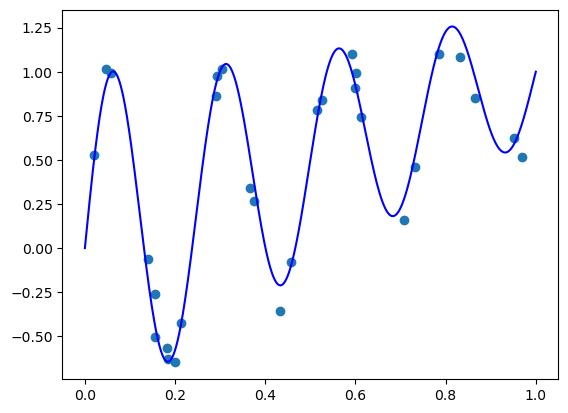

In [11]:
plt_xs = np.linspace(0, 1, 1000)
plt.scatter(X, y)
plt.plot(plt_xs, true_func(plt_xs), 'blue')
plt.show()

### 1. Simple polynomial regression

In [12]:
n = 50
X_poly = poly.polyvander(X, deg=n)
X_poly.shape

(30, 51)

In [13]:
X_poly[0,:]

array([1.00000000e+00, 3.74540119e-01, 1.40280301e-01, 5.25406005e-02,
       1.96785627e-02, 7.37041123e-03, 2.76051470e-03, 1.03392350e-03,
       3.87245832e-04, 1.45039100e-04, 5.43229617e-05, 2.03461285e-05,
       7.62044140e-06, 2.85416103e-06, 1.06899781e-06, 4.00382567e-07,
       1.49959334e-07, 5.61657868e-08, 2.10363405e-08, 7.87895346e-09,
       2.95098417e-09, 1.10526196e-09, 4.13964946e-10, 1.55046480e-10,
       5.80711271e-11, 2.17499668e-11, 8.14623516e-12, 3.05109189e-12,
       1.14275632e-12, 4.28008087e-13, 1.60306200e-13, 6.00411031e-14,
       2.24878019e-14, 8.42258399e-15, 3.15459561e-15, 1.18152261e-15,
       4.42527621e-16, 1.65744348e-16, 6.20779076e-17, 2.32506669e-17,
       8.70830755e-18, 3.26161054e-18, 1.22160400e-18, 4.57539708e-19,
       1.71366976e-19, 6.41838077e-20, 2.40394110e-20, 9.00372384e-21,
       3.37225580e-21, 1.26304509e-21, 4.73061057e-22])

In [14]:
model = LinearRegression(fit_intercept=False)
model.fit(X_poly, y)

LinearRegression(fit_intercept=False)

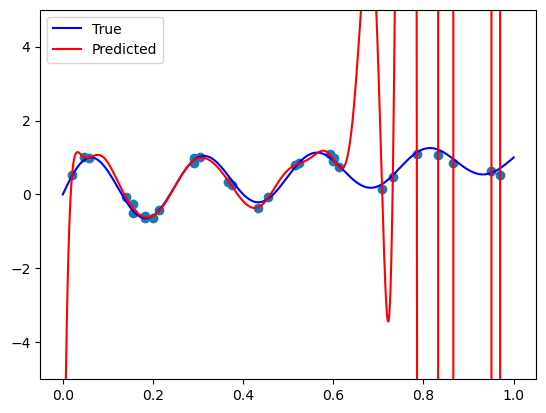

In [15]:
plt.scatter(X, y)                                    # plot the samples
plt.plot(plt_xs, true_func(plt_xs), 'blue', label='True')                          # plot the true function
plt.plot(plt_xs, model.predict(poly.polyvander(plt_xs, deg=n)), 'r', label="Predicted") # plot the fit model
plt.ylim([-5, 5])
plt.legend()
plt.show()

### Ridge regression with polynomial basis

In [16]:
# Fit a linear model
def fit_and_plot(vander, n, alpha):
  model = Ridge(fit_intercept=False, alpha=alpha)
  model.fit(vander(X, deg=n), y)

  plt.scatter(X, y)                           # plot the samples
  plt.plot(plt_xs, true_func(plt_xs), 'blue')                 # plot the true function
  plt.plot(plt_xs, model.predict(vander(plt_xs, deg=n)), 'r') # plot the fit model
  plt.ylim([-5, 5])
  plt.show()

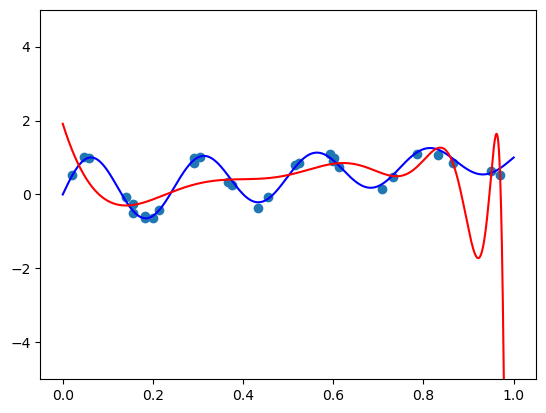

In [17]:
fit_and_plot(poly.polyvander, n=50, alpha=1e-7)

### 2. Chebyshev basis

In [18]:
def scaled_chebvander(x, deg):
  return cheb.chebvander(2 * x - 1, deg=deg)

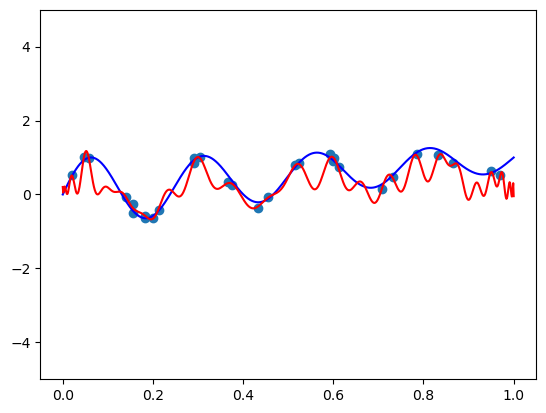

In [19]:
fit_and_plot(scaled_chebvander, n=50, alpha=1)

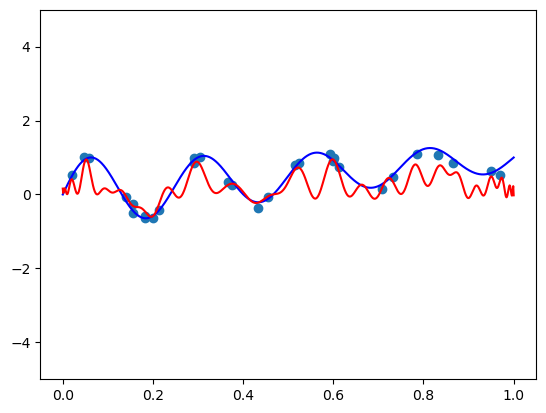

In [20]:
fit_and_plot(scaled_chebvander, n=50, alpha=10)

### 3. Legendre basis

In [21]:
def scaled_legvander(x, deg):
  return leg.legvander(2 * x - 1, deg=deg)

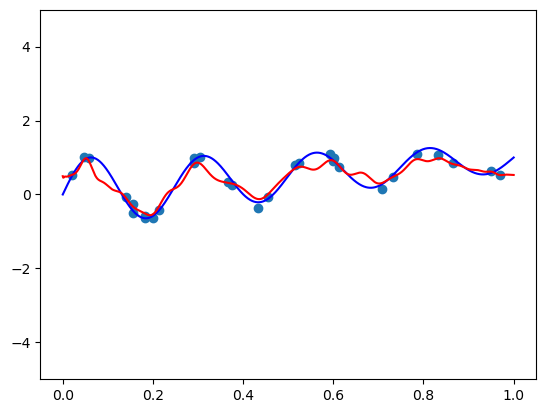

In [22]:
fit_and_plot(scaled_legvander, n=50, alpha=0.5)

### 4. Bernstein basis

In [23]:
def bernvander(x, deg):
	return binom.pmf(np.arange(1 + deg), deg, x.reshape(-1, 1))

c:\Users\ryees\anaconda3\envs\pml\Lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


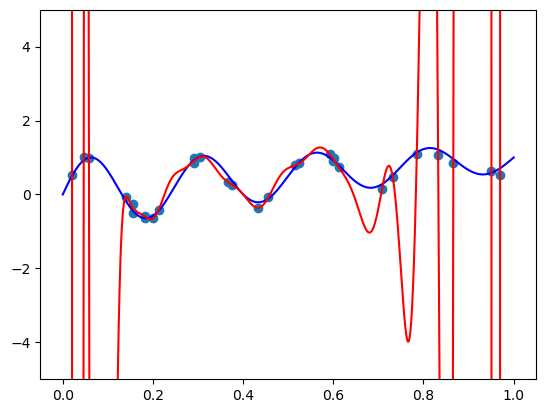

In [24]:
fit_and_plot(bernvander, n=50, alpha=0)

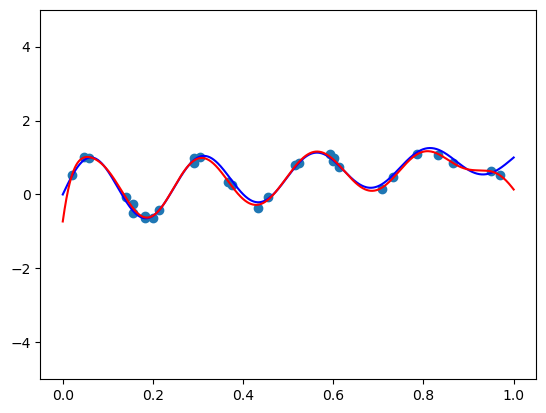

In [25]:
fit_and_plot(bernvander, n=50, alpha=5e-4)

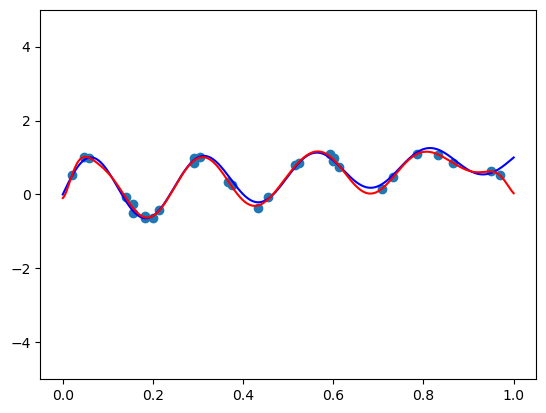

In [26]:
fit_and_plot(bernvander, n=100, alpha=5e-4)